In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./diabetes.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
mean_arr = df.mean().to_numpy()

In [4]:
df["Glucose"] = df["Glucose"].apply(lambda x: x if x != 0 else mean_arr[1])
df["BloodPressure"] = df["BloodPressure"].apply(lambda x: x if x != 0 else mean_arr[2])
df["SkinThickness"] = df["SkinThickness"].apply(lambda x: x if x != 0 else mean_arr[3])
df["Insulin"] = df["Insulin"].apply(lambda x: x if x != 0 else mean_arr[4])

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


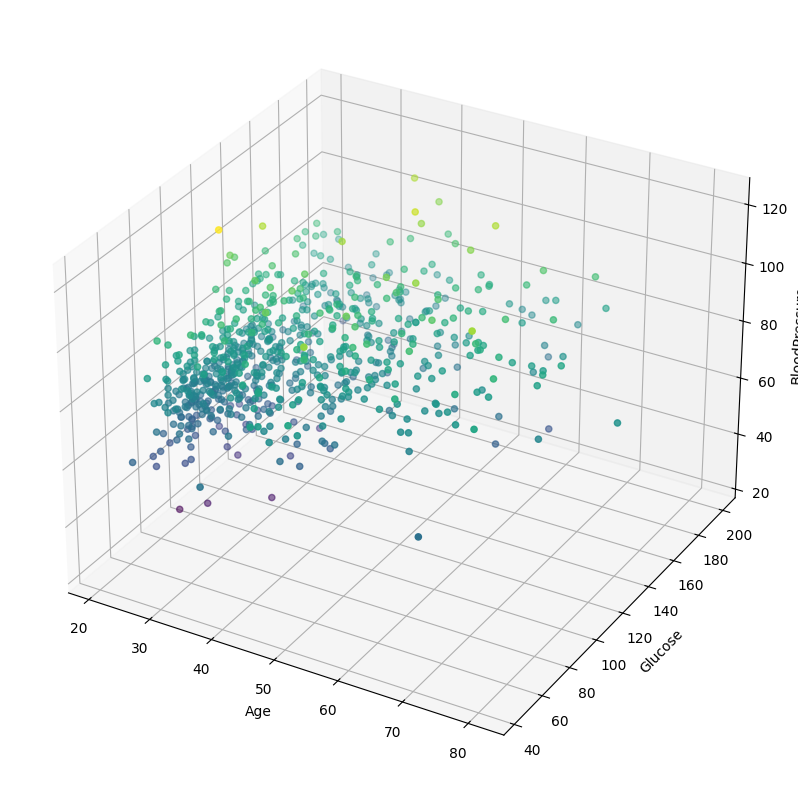

In [6]:
# df.info()
# #%%
feature_1 = "Age"
feature_2 = "Glucose"
feature_3 = "BloodPressure"

x = df[feature_1]
y = df[feature_2]
z = df[feature_3]

fig = plt.figure(figsize=(10, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z)

ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)

plt.show()

# Scaling

In [7]:
std_arr = df.std().to_numpy()
mean_arr = df.mean().to_numpy()

min_arr = df.min().to_numpy()
max_arr = df.max().to_numpy()

for i, col in enumerate(df.columns):
    if col == "Outcome":
        continue
    df[col] = (df[col] - min_arr[i]) / (max_arr[i] - min_arr[i])

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.500745,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.396423,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.347243,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.418778,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.490313,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.079086,0.548435,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.390462,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.147135,0.079086,0.448584,0.115713,0.433333,1


# Train-Test split

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size = 0.2) 

In [10]:
train_x = train.drop("Outcome", axis=1)
train_y = train["Outcome"]
test_x = test.drop("Outcome", axis=1)
test_y = test["Outcome"]

# Model

In [11]:
class KNN:
    def __init__(self, k: int, col_names: list[str]):
        self.k = k
        self.col_names = col_names

    def train(self, x, y):
        self.x = np.array(x[self.col_names])
        self.y = np.array(y)

    def pred(self, x):
        x = np.array(x[self.col_names])
        ans = []

        for row in x:
            tmp = np.linalg.norm(self.x - row, axis=1)
            k_ids = tmp.argsort()[:self.k]
            k_classes = self.y[k_ids]
            classes, counts = np.unique(k_classes, return_counts=True)
            winner = counts.argsort()[0]
            ans.append(classes[winner])

        return np.array(ans)

# Error Matrix

In [12]:
from matplotlib.colors import ListedColormap

In [13]:
def error_matrix(pred_y, true_y):
    res = np.zeros((2, 2))

    for pred, true in zip(pred_y, true_y):
        res[int(pred), true] += 1

    return res

def show_matrix(ax, pred_y, true_y):
    res = error_matrix(pred_y, true_y)
    cmap = ListedColormap(['white'])
    
    ax.matshow(res, cmap=cmap)
    ax.set_xlabel('True class')
    ax.set_ylabel('Predicted class')

    for (i, j), z in np.ndenumerate(res):
        ax.text(j, i, str(int(z)), ha='center', va='center')
    
    print()
    print("Accuracy:", (res[0][0]+res[1][1])/(res[0][0] + res[0][1]+res[1][0]+res[1][1]))
    print("Precision:", (res[1][1])/(res[1][0]+res[1][1]))
    print("Recall:", (res[1][1])/(res[0][0]+res[1][1]))

# Random Feature Selection

Случайно выбраны столбцы:
 Pedigree
SkinThickness
Age
BloodPressure

Accuracy: 0.564935064935065
Precision: 0.6707317073170732
Recall: 0.632183908045977

Accuracy: 0.4935064935064935
Precision: 0.6197183098591549
Recall: 0.5789473684210527

Accuracy: 0.44805194805194803
Precision: 0.5694444444444444
Recall: 0.5942028985507246


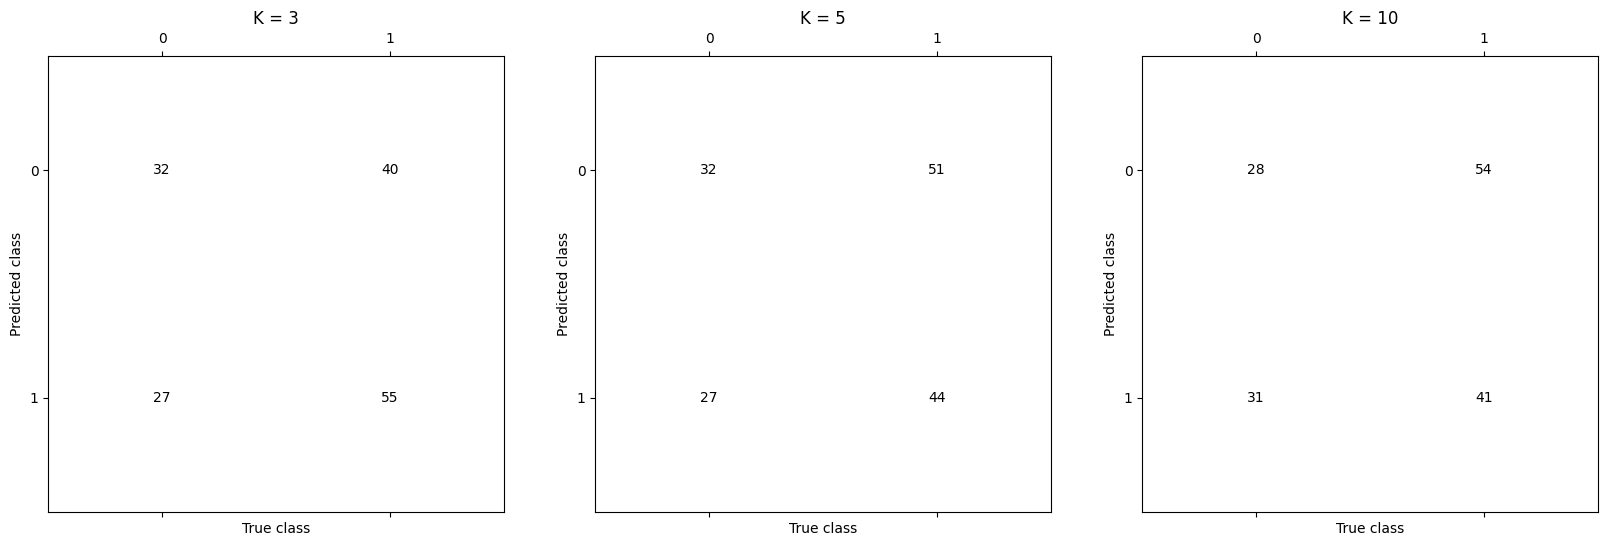

In [14]:
col_names = np.random.choice(train_x.columns, size=np.random.randint(1, len(train_x.columns)), replace=False)
print('Случайно выбраны столбцы:\n', '\n'.join(col_names))

plt.figure(figsize=(20, 6))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, col_names)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)

    ax = plt.subplot(1, 3, i)
    ax.set_title('K = %d' %k)

    show_matrix(ax, pred_y-1, test_y-1)

# All Features Selected


Accuracy: 0.5714285714285714
Precision: 0.6593406593406593
Recall: 0.6818181818181818

Accuracy: 0.551948051948052
Precision: 0.6585365853658537
Recall: 0.6352941176470588

Accuracy: 0.474025974025974
Precision: 0.5875
Recall: 0.6438356164383562


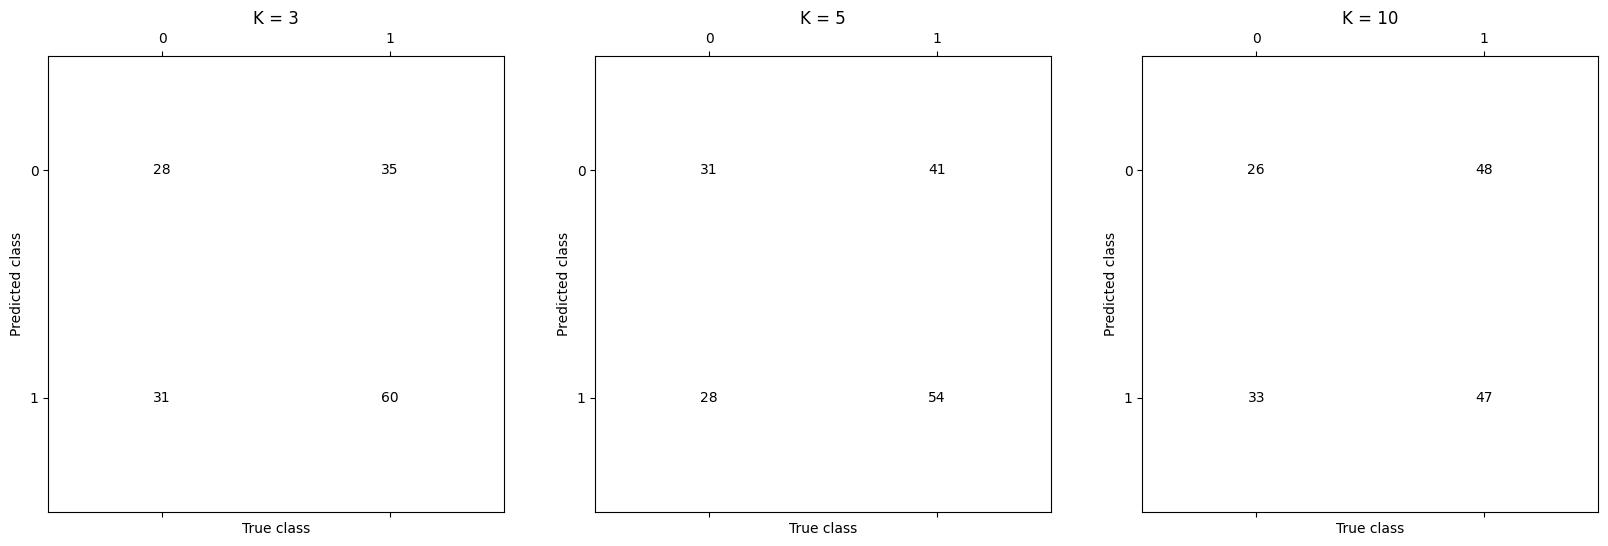

In [15]:
plt.figure(figsize=(20, 6))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, train_x.columns)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)

    ax = plt.subplot(1, 3, i)
    ax.set_title('K = %d' %k)

    show_matrix(ax, pred_y-1, test_y-1)